https://debuggercafe.com/train-s3d-video-classification-model/

# Зависимости

In [1]:
!pip install av
!pip install -U albumentations --no-binary qudida,albumentations

  Using cached av-16.0.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (4.6 kB)
Using cached av-16.0.1-cp311-cp311-manylinux_2_28_x86_64.whl (40.2 MB)
  Using cached albumentations-2.0.8-py3-none-any.whl
  Using cached numpy-2.3.5-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.16.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached pydantic-2.12.5-py3-none-any.whl.metadata (90 kB)
  Using cached albucore-0.0.24-py3-none-any.whl.metadata (5.3 kB)
  Using cached opencv_python_headless-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
  Using cached stringzilla-4.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (121 kB)
  Using cached simsimd-6.5.8-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (70 kB)
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_

In [9]:
!pip install scikit-learn
!pip install torch torchvision
!pip install tqdm
!pip install matplotlib

  Using cached matplotlib-3.10.8-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.8-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
Using cached contourpy-1.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (355 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (5.0 MB)
Using cached kiwisolver-1.4.9-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.w

# Подготовка датасета

In [1]:
!pwd

/mnt/c/Notebooks/Workout


In [1]:
%cd ./code/src
!pwd

/mnt/c/Notebooks/Workout/code/src
/mnt/c/Notebooks/Workout/code/src


In [5]:
!python resize_videos.py

100%|█████████████████████████████████████████| 652/652 [06:22<00:00,  1.71it/s]


In [6]:
!python split_data.py

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 34.46it/s]


In [21]:
class_names = ['chest fly machine', 'leg raises', 'pull Up', 'push-up', 'squat', 'tricep dips']

In [20]:
!python -W ignore train.py --epochs 40 --batch-size 8 -lr 0.0001 --clip-len 30 --frame-rate 30 --clips-per-video 5 --imgsz 256 256 --crop-size 224 224 --fine-tune --scheduler 

100%|███████████████████████████████████████████| 31/31 [00:05<00:00,  5.40it/s]
{'barbell biceps curl': 0, 'bench press': 1, 'chest fly machine': 2, 'deadlift': 3, 'decline bench press': 4, 'hammer curl': 5, 'hip thrust': 6, 'incline bench press': 7, 'lat pulldown': 8, 'lateral raise': 9, 'leg extension': 10, 'leg raises': 11, 'plank': 12, 'pull Up': 13, 'push-up': 14, 'romanian deadlift': 15, 'russian twist': 16, 'shoulder press': 17, 'squat': 18, 't bar row': 19, 'tricep Pushdown': 20, 'tricep dips': 21}
100%|█████████████████████████████████████████████| 4/4 [00:01<00:00,  2.94it/s]
{'barbell biceps curl': 0, 'bench press': 1, 'chest fly machine': 2, 'deadlift': 3, 'decline bench press': 4, 'hammer curl': 5, 'hip thrust': 6, 'incline bench press': 7, 'lat pulldown': 8, 'lateral raise': 9, 'leg extension': 10, 'leg raises': 11, 'plank': 12, 'pull Up': 13, 'push-up': 14, 'romanian deadlift': 15, 'russian twist': 16, 'shoulder press': 17, 'squat': 18, 't bar row': 19, 'tricep Pushdown

In [4]:
!python -W ignore train-kfold.py --fold 5 --epochs 40 --batch-size 4 -lr 0.0001 --clip-len 16 --frame-rate 15 --clips-per-video 5 --imgsz 256 256 --crop-size 224 224 --fine-tune --scheduler 

100%|█████████████████████████████████████████████| 7/7 [00:07<00:00,  1.13s/it]
{'chest fly machine': 0, 'leg raises': 1, 'pull Up': 2, 'push-up': 3, 'squat': 4, 'tricep dips': 5}
100%|█████████████████████████████████████████████| 2/2 [00:11<00:00,  5.57s/it]
{'chest fly machine': 0, 'pull Up': 1, 'squat': 2, 'tricep dips': 3}
[INFO]: Number of training images: 11181
[INFO]: Number of validation images: 4167
[INFO]: Classes: ['chest fly machine', 'leg raises', 'pull Up', 'push-up', 'squat', 'tricep dips']
Computation device: cuda
Learning rate: 0.0001
Epochs to train for: 40

[INFO]: Fine-tuning all layers...
S3D(
  (features): Sequential(
    (0): TemporalSeparableConv(
      (0): Conv3dNormActivation(
        (0): Conv3d(3, 64, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3), bias=False)
        (1): BatchNorm3d(64, eps=0.001, momentum=0.001, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (1): Conv3dNormActivation(
        (0): Conv3

In [2]:
from inference_func import inference

In [3]:
!python inference_video.py --input "../../full_workout_dataset/split/test/chest fly machine/chest fly machine_14.mp4" --imgsz 256 256 --crop-size 224 224

/mnt/c/Notebooks/Workout/code/src/inference_video.py:56: UserWarning: Argument(s) 'always_apply' are not valid for transform Resize
  A.Resize(resize_size[1], resize_size[0], always_apply=True),
/mnt/c/Notebooks/Workout/code/src/inference_video.py:57: UserWarning: Argument(s) 'always_apply' are not valid for transform CenterCrop
  A.CenterCrop(crop_size[1], crop_size[0], always_apply=True),
/mnt/c/Notebooks/Workout/code/src/inference_video.py:58: UserWarning: Argument(s) 'always_apply' are not valid for transform Normalize
  A.Normalize(
Number of frames to consider for each prediction: 16
[INFO]: Freezing hidden layers...
Frame: 1, FPS: 3.0
Frame: 2, FPS: 39.0
Frame: 3, FPS: 46.8
Frame: 4, FPS: 52.5
Frame: 5, FPS: 53.9
Frame: 6, FPS: 38.3
Frame: 7, FPS: 49.2
Frame: 8, FPS: 39.8
Frame: 9, FPS: 47.0
Frame: 10, FPS: 51.1
Frame: 11, FPS: 56.8
Frame: 12, FPS: 52.9
Frame: 13, FPS: 55.7
Frame: 14, FPS: 57.0
Frame: 15, FPS: 52.4
Frame: 16, FPS: 53.3
Frame: 17, FPS: 52.7
Frame: 18, FPS: 54.2
F

In [4]:
import torch
import argparse
import torch.nn as nn
import torch.optim as optim
import os
import numpy as np
import random
import presets
import gc

from tqdm.auto import tqdm
from model import build_model
from datasets import VideoClassificationDataset
from utils import save_model, save_plots, SaveBestModel
from torchvision.datasets.samplers import (
    RandomClipSampler, UniformClipSampler
)
from torch.utils.data.dataloader import default_collate

from sklearn.metrics import accuracy_score, hamming_loss, precision_score, recall_score, confusion_matrix

def collate_fn(batch):
    batch = [(d[0], d[1]) for d in batch]
    return default_collate(batch)

# Validation function.
def validate_by_classes(model, testloader, criterion, class_amount):
    model.eval()
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    bs_accumuator = 0
    counter = 0
    prog_bar = tqdm(
        testloader, 
        total=len(testloader), 
        bar_format='{l_bar}{bar:20}{r_bar}{bar:-20b}'
    )
    
    acc_by_classes = {k:[0, 0, 0, 0] for k in range(class_amount)} # TP, TN, FP, FN

    total_pred = []
    total_labels = []
    with torch.no_grad():
        for i, data in enumerate(prog_bar):
            counter += 1
            
            image, labels = data
            image = image.to(device)
            labels = labels.to(device)
            # Forward pass.
            outputs = model(image)
            bs_accumuator += outputs.shape[0]
            # Calculate the loss.
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            # Calculate the accuracy.
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()

            for i in range(len(labels)):
                p = preds[i].item()
                l = labels[i].item()
                if p == l:
                    for key in acc_by_classes.keys():
                        if key == p:
                            acc_by_classes[key][0] += 1
                        else:
                            acc_by_classes[key][1] += 1
                else:
                    acc_by_classes[p][2] += 1
                    acc_by_classes[l][3] += 1

            total_pred += preds
            total_labels += labels
                
        
    # Loss and accuracy for the complete epoch.
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / bs_accumuator)

    gc.collect()
    torch.cuda.empty_cache()

    accuracy = {}
    for key in acc_by_classes:
        v = acc_by_classes[key]
        accuracy[key] = (v[0] + v[1]) / (v[0] + v[1] + v[2] + v[3])
    
    return epoch_loss, epoch_acc, accuracy, total_labels, total_pred

In [5]:
import albumentations as A

crop_size = (224, 224)
resize_size = (256, 256)
transform_valid = presets.VideoClassificationPresetTrain(
        crop_size=crop_size, 
        resize_size=resize_size, 
        hflip_prob=0.0
    )

In [6]:
criterion = nn.CrossEntropyLoss()
workers = 4
batch_size = 8
clips_per_video = 5
clip_len = 16
frame_rate = 15
FOLD_NUM = 1

dataset_valid = VideoClassificationDataset(
        os.path.join('..', '..', 'folds', str(FOLD_NUM)),
        frames_per_clip=clip_len,
        frame_rate=frame_rate,
        split="test",
        transform=transform_valid,
        extensions=(
            "mp4",
            'avi',
            'mov'
        ),
        output_format="TCHW",
        num_workers=workers
)

test_sampler = UniformClipSampler(
    dataset_valid.video_clips, num_clips_per_video=clips_per_video
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=batch_size,
    sampler=test_sampler,
    num_workers=workers,
    pin_memory=True,
    collate_fn=collate_fn,
)

  0%|                                                                                             | 0/4 [00:00<?, ?it/s]/home/dlyko/miniconda3/envs/workout_2/lib/python3.11/site-packages/torchvision/io/_video_deprecation_warning.py:9: UserWarning: The video decoding and encoding capabilities of torchvision are deprecated from version 0.22 and will be removed in version 0.24. We recommend that you migrate to TorchCodec, where we'll consolidate the future decoding/encoding capabilities of PyTorch: https://github.com/pytorch/torchcodec
  warnings.warn(
/home/dlyko/miniconda3/envs/workout_2/lib/python3.11/site-packages/torchvision/io/_video_deprecation_warning.py:9: UserWarning: The video decoding and encoding capabilities of torchvision are deprecated from version 0.22 and will be removed in version 0.24. We recommend that you migrate to TorchCodec, where we'll consolidate the future decoding/encoding capabilities of PyTorch: https://github.com/pytorch/torchcodec
  warnings.warn(
/home/dl

{'chest fly machine': 0, 'leg raises': 1, 'pull Up': 2, 'push-up': 3, 'squat': 4, 'tricep dips': 5}


In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ckpt = torch.load('../outputs/best_model.pth')
# load the model
model = build_model(
    fine_tune=False,
    num_classes=len(class_names)
)
# load the model onto the computation device
model.load_state_dict(ckpt['model_state_dict'])
model = model.eval().to(device)

[INFO]: Freezing hidden layers...


In [14]:
model

S3D(
  (features): Sequential(
    (0): TemporalSeparableConv(
      (0): Conv3dNormActivation(
        (0): Conv3d(3, 64, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3), bias=False)
        (1): BatchNorm3d(64, eps=0.001, momentum=0.001, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (1): Conv3dNormActivation(
        (0): Conv3d(64, 64, kernel_size=(7, 1, 1), stride=(2, 1, 1), padding=(3, 0, 0), bias=False)
        (1): BatchNorm3d(64, eps=0.001, momentum=0.001, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (1): MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 2, 2), padding=(0, 1, 1), dilation=1, ceil_mode=False)
    (2): Conv3dNormActivation(
      (0): Conv3d(64, 64, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
      (1): BatchNorm3d(64, eps=0.001, momentum=0.001, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): TemporalSeparableConv(
      (0): Conv3d

In [10]:
CLASSES_AMOUNT = 6
epoch_loss, epoch_acc, accuracy, total_labels, total_pred = validate_by_classes(model, valid_loader, criterion, CLASSES_AMOUNT)

Validation


/home/dlyko/miniconda3/envs/workout_2/lib/python3.11/site-packages/torchvision/io/_video_deprecation_warning.py:9: UserWarning: The video decoding and encoding capabilities of torchvision are deprecated from version 0.22 and will be removed in version 0.24. We recommend that you migrate to TorchCodec, where we'll consolidate the future decoding/encoding capabilities of PyTorch: https://github.com/pytorch/torchcodec
  warnings.warn(
/home/dlyko/miniconda3/envs/workout_2/lib/python3.11/site-packages/torchvision/io/_video_deprecation_warning.py:9: UserWarning: The video decoding and encoding capabilities of torchvision are deprecated from version 0.22 and will be removed in version 0.24. We recommend that you migrate to TorchCodec, where we'll consolidate the future decoding/encoding capabilities of PyTorch: https://github.com/pytorch/torchcodec
  warnings.warn(
/home/dlyko/miniconda3/envs/workout_2/lib/python3.11/site-packages/torchvision/io/_video_deprecation_warning.py:9: UserWarning: 

  0%|                    | 0/34 [00:00<?, ?it/s]

/home/dlyko/miniconda3/envs/workout_2/lib/python3.11/site-packages/torchvision/io/video.py:199: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")
/home/dlyko/miniconda3/envs/workout_2/lib/python3.11/site-packages/torchvision/io/video.py:199: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")
/home/dlyko/miniconda3/envs/workout_2/lib/python3.11/site-packages/torchvision/io/video.py:199: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")
/home/dlyko/miniconda3/envs/workout_2/lib/python3.11/site-packages/torchvision/io/_video_deprecation_warning.py:9: UserWarning: The video decoding and encoding capabilities of torchvision are deprecated from versio

In [11]:
epoch_loss, epoch_acc

(0.8556639797376085, 75.18518518518519)

In [12]:
accuracy

{0: 0.9227272727272727,
 1: 0.8388429752066116,
 2: 0.9759615384615384,
 3: 0.9620853080568721,
 4: 0.9022222222222223,
 5: 0.8252032520325203}

In [13]:
total_labels = [t.cpu() for t in total_labels]

In [14]:
total_pred = [t.cpu() for t in total_pred]

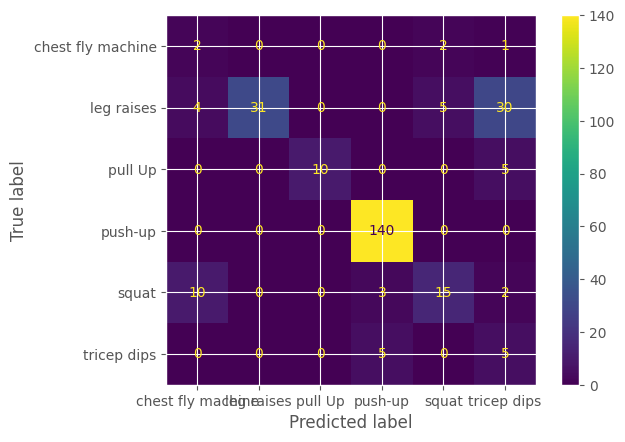

In [15]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(total_labels, total_pred), display_labels=['chest fly machine', 'leg raises', 'pull Up', 'push-up', 'squat', 'tricep dips']) \
    .plot()

# На 21.10.25:

1. Прогнать тестовую выборку через инференс. Посмотреть глазами
2. Сделать ручной анализ датасета (сколько одинаковых людей, какие ракурсы есть, в каком кол-ве)
3. Попробовать больший размер клипов (до 100-200 кадров)

In [42]:
%pwd

'/mnt/c/Notebooks/Workout/code/src'

In [18]:
from inference_func import inference
from pathlib import Path

In [3]:
class_names

NameError: name 'class_names' is not defined

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ckpt = torch.load('../outputs/best_model.pth')
# load the model
model = build_model(
    fine_tune=False,
    num_classes=len(class_names)
)
# load the model onto the computation device
model.load_state_dict(ckpt['model_state_dict'])
model = model.eval().to(device)

[INFO]: Freezing hidden layers...


In [8]:
model

S3D(
  (features): Sequential(
    (0): TemporalSeparableConv(
      (0): Conv3dNormActivation(
        (0): Conv3d(3, 64, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3), bias=False)
        (1): BatchNorm3d(64, eps=0.001, momentum=0.001, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (1): Conv3dNormActivation(
        (0): Conv3d(64, 64, kernel_size=(7, 1, 1), stride=(2, 1, 1), padding=(3, 0, 0), bias=False)
        (1): BatchNorm3d(64, eps=0.001, momentum=0.001, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (1): MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 2, 2), padding=(0, 1, 1), dilation=1, ceil_mode=False)
    (2): Conv3dNormActivation(
      (0): Conv3d(64, 64, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
      (1): BatchNorm3d(64, eps=0.001, momentum=0.001, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): TemporalSeparableConv(
      (0): Conv3d

In [19]:
FOLD_NUM = 1

fold_path = os.path.join('..', '..', 'folds', str(FOLD_NUM))
fold_test = os.path.join(fold_path, 'test')
for label in os.listdir(fold_test):
    inference_path = Path(os.path.join(str(fold_path), 'inference', label))
    inference_path.mkdir(parents=True, exist_ok=True)

    test = Path(fold_test)
    videos = test.glob('**/*')
    videos = [x for x in videos if x.is_file()]

    for video in videos:
        inference(model, device, class_names, str(video), str(inference_path))

/mnt/c/Notebooks/Workout/code/src/inference_func.py:19: UserWarning: Argument(s) 'always_apply' are not valid for transform Resize
  A.Resize(resize_size[1], resize_size[0], always_apply=True),
/mnt/c/Notebooks/Workout/code/src/inference_func.py:20: UserWarning: Argument(s) 'always_apply' are not valid for transform CenterCrop
  A.CenterCrop(crop_size[1], crop_size[0], always_apply=True),
/mnt/c/Notebooks/Workout/code/src/inference_func.py:21: UserWarning: Argument(s) 'always_apply' are not valid for transform Normalize
  A.Normalize(


Number of frames to consider for each prediction: 16
Frame: 1, FPS: 4.6
Frame: 2, FPS: 10.9
Frame: 3, FPS: 24.2
Frame: 4, FPS: 27.4
Frame: 5, FPS: 27.1
Frame: 6, FPS: 38.5
Frame: 7, FPS: 35.2
Frame: 8, FPS: 36.7
Frame: 9, FPS: 34.1
Frame: 10, FPS: 34.8
Frame: 11, FPS: 34.1
Frame: 12, FPS: 37.2
Frame: 13, FPS: 28.5
Frame: 14, FPS: 34.9
Frame: 15, FPS: 36.4
Frame: 16, FPS: 34.3
Frame: 17, FPS: 37.7
Frame: 18, FPS: 41.3
Frame: 19, FPS: 37.3
Frame: 20, FPS: 37.7
Frame: 21, FPS: 38.5
Frame: 22, FPS: 37.4
Frame: 23, FPS: 41.5
Frame: 24, FPS: 39.5
Frame: 25, FPS: 41.1
Frame: 26, FPS: 38.7
Frame: 27, FPS: 31.0
Frame: 28, FPS: 34.7
Frame: 29, FPS: 38.7
Frame: 30, FPS: 33.0
Frame: 31, FPS: 42.8
Frame: 32, FPS: 39.5
Frame: 33, FPS: 41.6
Frame: 34, FPS: 32.9
Frame: 35, FPS: 38.9
Frame: 36, FPS: 36.2
Frame: 37, FPS: 39.7
Frame: 38, FPS: 37.7
Frame: 39, FPS: 35.3
Frame: 40, FPS: 38.5
Frame: 41, FPS: 38.3
Frame: 42, FPS: 41.5
Frame: 43, FPS: 38.8
Frame: 44, FPS: 37.0
Frame: 45, FPS: 36.3
Frame: 46, F

KeyboardInterrupt: 

In [20]:
FOLD_NUM = 1

fold_path = os.path.join('..', '..', 'folds', str(FOLD_NUM))
test_path = '/mnt/c/Users/dlyko/YandexDisk/My folder/УРФУ/Магистратура/Видео с упражнениями'

inference_path = Path(os.path.join(str(fold_path), 'inference', 'special'))
inference_path.mkdir(parents=True, exist_ok=True)
for video_name in os.listdir(test_path):
    video = os.path.join(test_path, video_name)
    inference(model, device, class_names, str(video), str(inference_path))

Number of frames to consider for each prediction: 16
Frame: 1, FPS: 4.6
Frame: 2, FPS: 5.9
Frame: 3, FPS: 35.3
Frame: 4, FPS: 41.2
Frame: 5, FPS: 31.8
Frame: 6, FPS: 39.8
Frame: 7, FPS: 39.2
Frame: 8, FPS: 33.9
Frame: 9, FPS: 28.5
Frame: 10, FPS: 44.6
Frame: 11, FPS: 47.2
Frame: 12, FPS: 48.1
Frame: 13, FPS: 51.3
Frame: 14, FPS: 40.6
Frame: 15, FPS: 47.9
Frame: 16, FPS: 46.3
Frame: 17, FPS: 49.0
Frame: 18, FPS: 42.3
Frame: 19, FPS: 46.3
Frame: 20, FPS: 44.9
Frame: 21, FPS: 50.6
Frame: 22, FPS: 48.3
Frame: 23, FPS: 50.5
Frame: 24, FPS: 47.4
Frame: 25, FPS: 51.5
Frame: 26, FPS: 49.8
Frame: 27, FPS: 48.8
Frame: 28, FPS: 48.1
Frame: 29, FPS: 50.3
Frame: 30, FPS: 48.7
Frame: 31, FPS: 39.5
Frame: 32, FPS: 42.2
Frame: 33, FPS: 45.6
Frame: 34, FPS: 45.9
Frame: 35, FPS: 50.5
Frame: 36, FPS: 49.2
Frame: 37, FPS: 51.1
Frame: 38, FPS: 44.6
Frame: 39, FPS: 46.5
Frame: 40, FPS: 48.2
Frame: 41, FPS: 50.6
Frame: 42, FPS: 44.3
Frame: 43, FPS: 48.7
Frame: 44, FPS: 47.9
Frame: 45, FPS: 48.0
Frame: 46, FP